In [106]:
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import math
import time
from keras.datasets import mnist

In [107]:
nSamples = 100

(train_digitImages, train_digitLabels) = mnist.load_data()[0]
(test_digitImages, test_digitLabels) = mnist.load_data()[1]

train_digitImages = train_digitImages[:nSamples]
train_digitLabels = train_digitLabels[:nSamples]

test_digitImages = test_digitImages[:nSamples]
test_digitLables = test_digitLabels[:nSamples]

#normalize images data
train_digitImages = train_digitImages / 255.0
train_digitLabels = train_digitLabels / 255.0

#flatten data
flat_train_digitImages = train_digitImages.reshape(train_digitImages.shape[0], -1)
flat_test_digitImages = test_digitLabels.reshape(test_digitImages.shape[0], -1)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
def getEuclideanDistance(single_point,array):
    nrows, ncols, nfeatures=array.shape[0],array.shape[1], array.shape[2]
    points=array.reshape((nrows*ncols,nfeatures))
                         
    dist = (points - single_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    dist=dist.reshape((nrows,ncols))
    return dist

In [ ]:

mu, sigma = 0, 0.1
A = np.random.normal(mu, sigma, 10)
#A.shape, A

In [ ]:
nrows,ncols,nfeatures=3,3,3

#Generate coordinate system
x,y=np.meshgrid(range(ncols),range(nrows))

In [ ]:

sgm0=2
sgmdecay=0.05
t=1
sgm = sgm0 * math.exp(-t*sgmdecay);

width = math.ceil(sgm*3)

dist=np.array([[2,1,3],[3,2,3],[4,4,4]])
bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) 

g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));


fromrow = max(0,bmurow - width);
torow   = min(bmurow + width,nrows);
fromcol = max(0,bmucol - width);
tocol   = min(bmucol + width,ncols);



In [ ]:
G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);



In [ ]:
def display_SOM(som, dispRes, nrows, ncols, title="SOM Features"):
    print(f"\n{title}:\n")
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
    
    for k in range(nrows):
        for l in range(ncols):
            A = som[k, l, :].reshape((dispRes[0], dispRes[1]))
            ax[k, l].imshow(A, cmap="plasma")
            ax[k, l].set_yticks([])
            ax[k, l].set_xticks([])   
    
    plt.show()


def SOM (dispRes, trainingData, ndim=10, nepochs=10, eta0=0.1, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]
    
    nrows = ndim
    ncols = ndim
    
    mu, sigma = 0, 0.1
    numpy.random.seed(int(time.time()))
    som = np.random.normal(mu, sigma, (nrows,ncols,nfeatures))

    if showMode >= 1:
        display_SOM(som, dispRes, nrows, ncols, title="SOM Features before training") 
    
    #Generate coordinate system
    x,y=np.meshgrid(range(ncols),range(nrows))
    
    
    for t in range (1,nepochs+1):
        #Compute the learning rate for the current epoch
        eta = eta0 * math.exp(-t*etadecay);
        
        #Compute the variance of the Gaussian (Neighbourhood) function for the ucrrent epoch
        sgm = sgm0 * math.exp(-t*sgmdecay);
        
        #Consider the width of the Gaussian function as 3 sigma
        width = math.ceil(sgm*3);
        
        for ntraining in range(ntrainingvectors):
            trainingVector = trainingData[ntraining,:];
            
            # Compute the Euclidean distance between the training vector and
            # each neuron in the SOM map
            dist = getEuclideanDistance(trainingVector, som);
       
            # Find 2D coordinates of the Best Matching Unit (bmu)
            bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
            
            
            #Generate a Gaussian function centered on the location of the bmu
            g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));

            #Determine the boundary of the local neighbourhood
            fromrow = max(0,bmurow - width);
            torow   = min(bmurow + width,nrows);
            fromcol = max(0,bmucol - width);
            tocol   = min(bmucol + width,ncols);

            
            #Get the neighbouring neurons and determine the size of the neighbourhood
            neighbourNeurons = som[fromrow:torow,fromcol:tocol,:];
            sz = neighbourNeurons.shape;
            
            #Transform the training vector and the Gaussian function into 
            # multi-dimensional to facilitate the computation of the neuron weights update
            T = np.matlib.repmat(trainingVector,sz[0]*sz[1],1).reshape((sz[0],sz[1],nfeatures));                   
            G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);

            # Update the weights of the neurons that are in the neighbourhood of the bmu
            neighbourNeurons = neighbourNeurons + eta * G * (T - neighbourNeurons);

            
            #Put the new weights of the BMU neighbouring neurons back to the
            #entire SOM map
            som[fromrow:torow,fromcol:tocol,:] = neighbourNeurons;

    if showMode >= 1:
        display_SOM (som, dispRes, nrows, ncols, title="SOM Features after training") 
        
    return som
    

In [ ]:
import pandas as pd
def parse_input_zoo_data(filename, header='infer'):

    input_data = pd.read_csv(filename, header=header)

    classes = input_data[17].tolist()
    labels = input_data[0].tolist()
    input_database = {
        0: input_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].to_numpy()
    }

    return input_database, labels, classes

In [ ]:
input_filename = 'data/zoo.txt'
input_vector_database, labels, classes = parse_input_zoo_data(input_filename,None)




SOM Features before training:



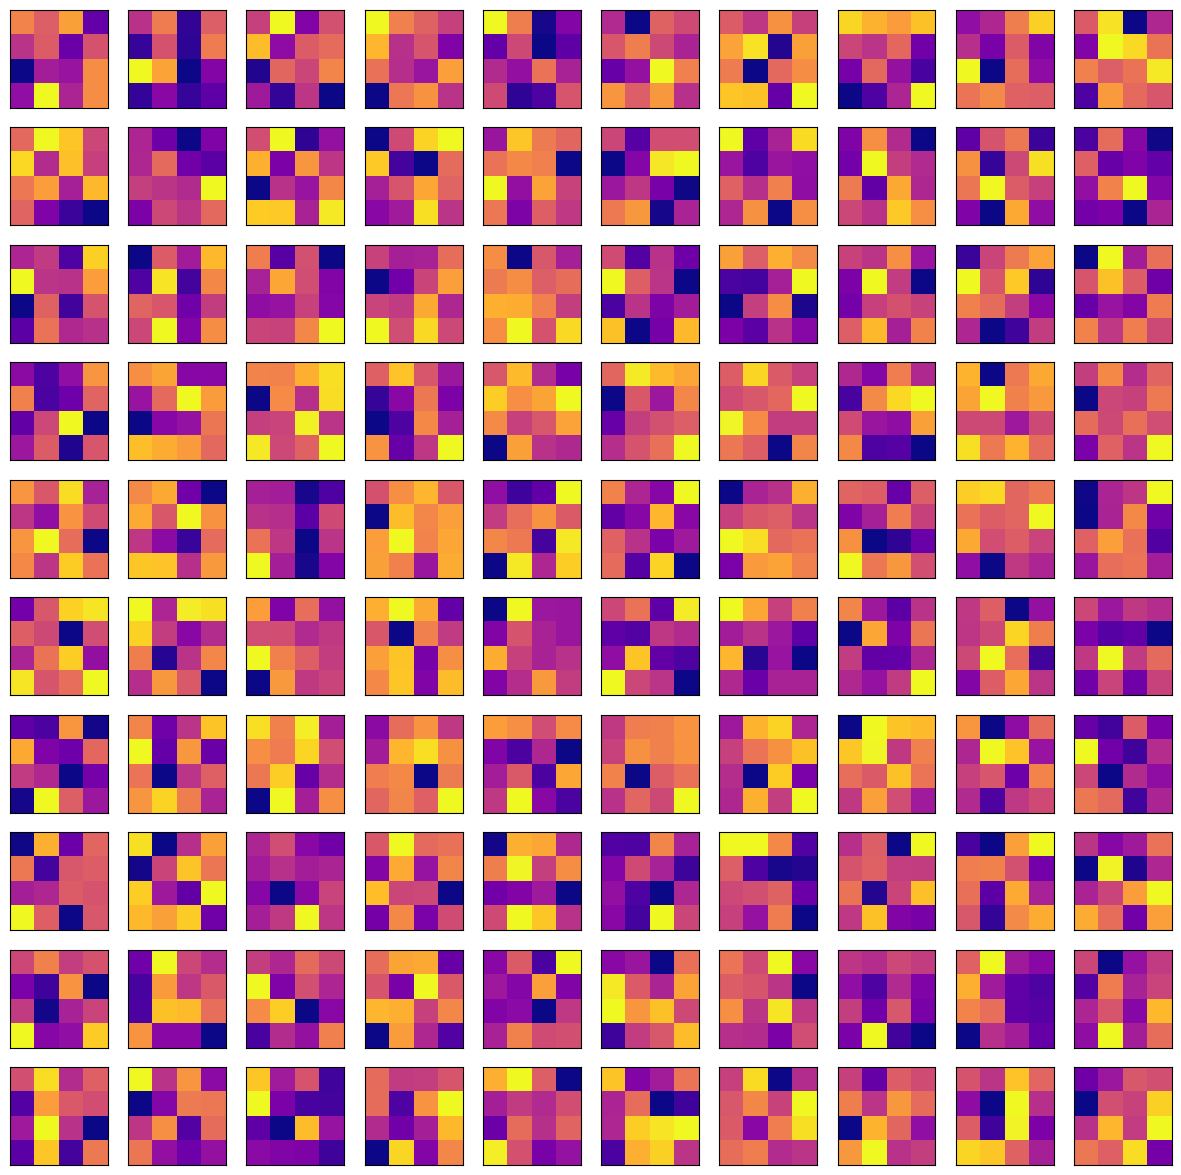


SOM Features after training:



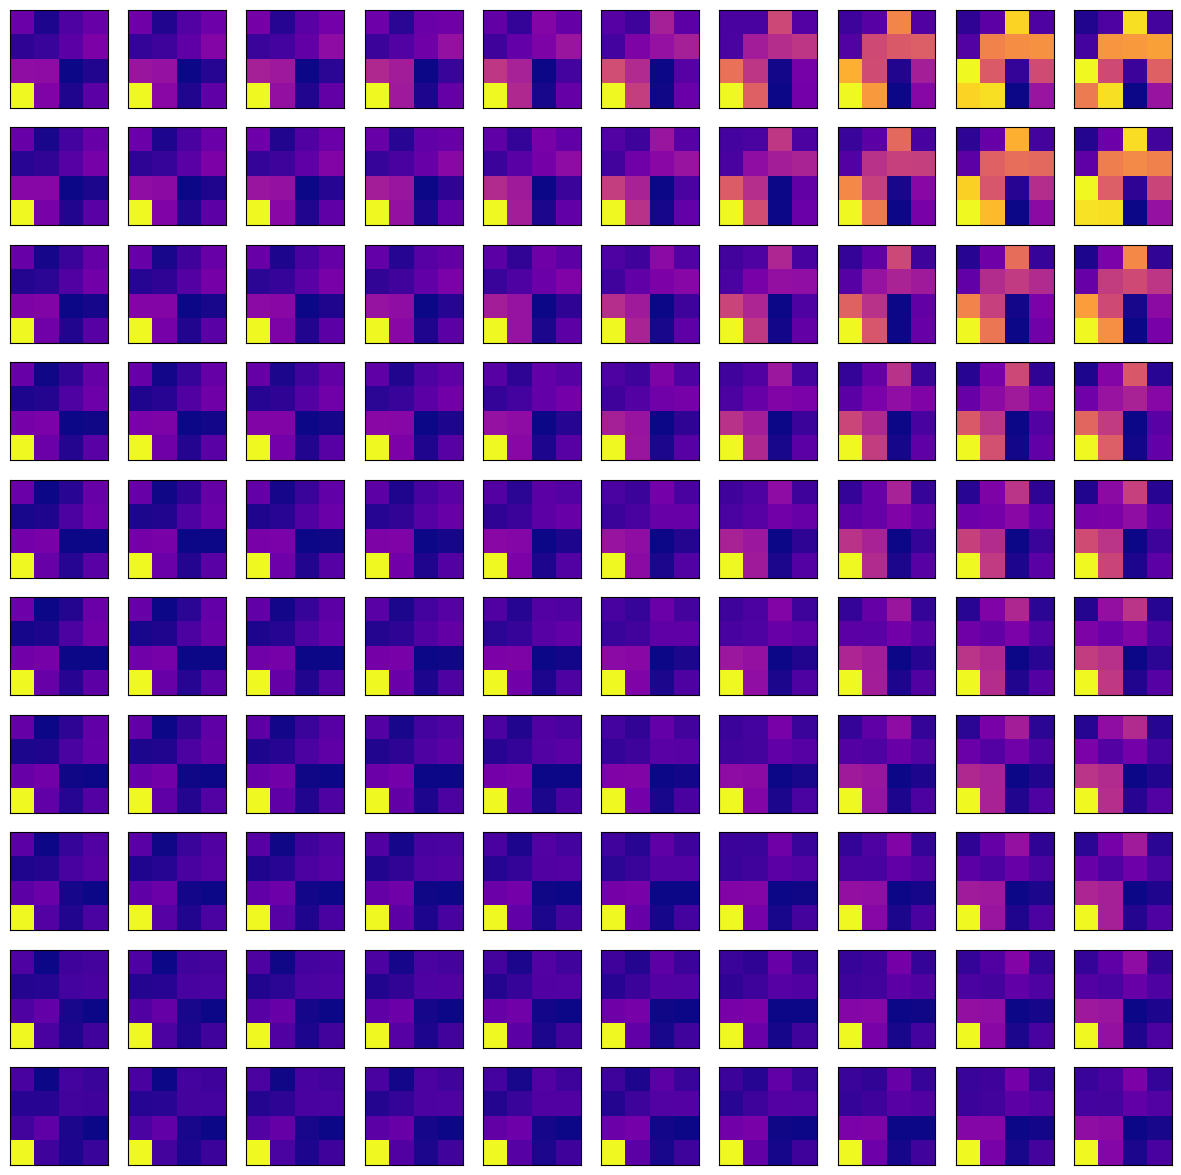

In [ ]:
som_trained=SOM ([4,4],input_vector_database[0], ndim=10, nepochs=100, eta0=0.01, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=1)


In [ ]:
plt.show()


In [ ]:
#verification of correctness on the training set:



def SOM_Test (trainingData, som_, classes, grid_, ConfusionMatrix, ndim=60):
    nfeatures=trainingData.shape[1]
    ntrainingvectors=trainingData.shape[0]
    
    nrows = ndim
    ncols = ndim
    
    nclasses=np.max(classes)

    som_cl=np.zeros((ndim,ndim,nclasses+1))
    
    
    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]    
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);
       
        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
        
        
        som_cl[bmurow, bmucol,class_of_sample]=som_cl[bmurow, bmucol,class_of_sample]+1
    
    
    
    for i in range (nrows):
        for j in range (ncols):
            grid_[i,j]=np.argmax(som_cl[i,j,:])

 
    for ntraining in range(ntrainingvectors):
        trainingVector = trainingData[ntraining,:];
        class_of_sample= classes[ntraining]    
        # Compute the Euclidean distance between the training vector and
        # each neuron in the SOM map
        dist = getEuclideanDistance(trainingVector, som_);
       
        # Find 2D coordinates of the Best Matching Unit (bmu)
        bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
        
        predicted=np.argmax(som_cl[bmurow, bmucol,:])
        ConfusionMatrix[class_of_sample-1, predicted-1]=ConfusionMatrix[class_of_sample-1, predicted-1]+1
        
    return grid_, ConfusionMatrix
    



In [ ]:
ndim=10
nrows=ndim
ncols=ndim
grid_color=np.zeros((nrows,ncols))
nclasses=np.max(classes)

Confusion_Matrix=np.zeros((nclasses,nclasses))
grid_color,Confusion_Matrix=SOM_Test (input_vector_database[0], som_trained, classes, grid_color, Confusion_Matrix, ndim)




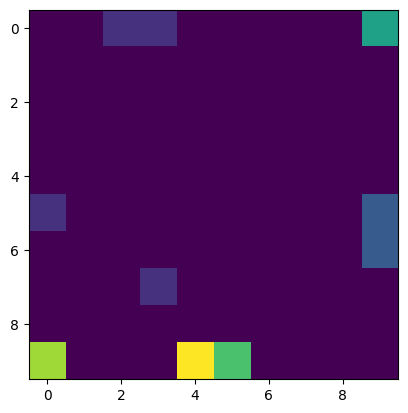

In [ ]:
plt.close()
plt.imshow(grid_color)
plt.show()

In [ ]:
#Confusion_Matrix, input_vector_database[0].shape, np.sum(Confusion_Matrix)